In [1]:
# 一、线性回归模型的tensorflow实现
# 二、掌握teonsorflow的框架下建立X到Y的线性回归模型
#    掌握模型构建的流程
#    掌握关于数据的处理方法

# 三、实验内容
# P50 3.2.2

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

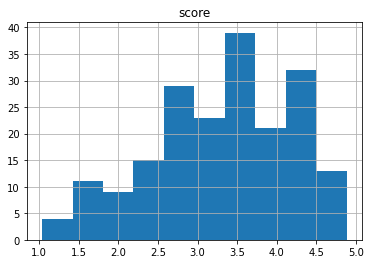

In [12]:
import pandas as pd
## 导入数据
MasterFile = pd.read_csv("D:\我的学习笔记\数据科学与大数据技术\深度学习从入门到精通\FoodScore.csv")
MasterFile[:5]
##直方图
MasterFile.hist()

In [13]:
# 分离因变量
import numpy as np

fileName = MasterFile["ID"]
#fileName
N = len(fileName)
Y = np.array(MasterFile["score"]).reshape([N, 1])

In [14]:
# 处理图像数据
from PIL import Image

Imsize = 128
X = np.zeros([N, Imsize, Imsize, 3])
for i in range(N):
    myfile = fileName[i]
    Im = Image.open("D:\我的学习笔记\数据科学与大数据技术\深度学习从入门到精通\data_foodscore\\"
                    + myfile + ".jpg")
    Im = Im.resize([Imsize, Imsize])
    Im = np.array(Im) / 255
    X[i,] = Im

D:\DSABD\Anaconda\www.anaconda.com\Anaconda3\envs\TensorflowOne\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 432x288 with 0 Axes>

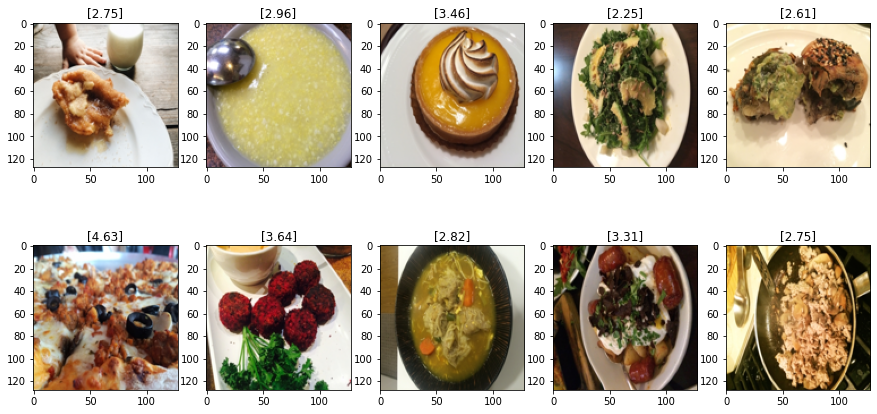

In [5]:
# 展示图片
from matplotlib import pyplot as plt

plt.figure()
fig, ax = plt.subplots(2, 5)
fig.set_figheight(7.5)
fig.set_figwidth(15)
ax = ax.flatten()
for i in range(10):
    ax[i].imshow(X[i,])
    ax[i].set_title(np.round(Y[i], 2))

In [6]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split

# X0, X1, Y0, Y1 = test_split(X, Y, test_size=0.5, random_state=0)
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.5, random_state=0)

In [7]:
# 构建模型
from keras.layers import Dense, Flatten, Input
from keras import Model

input_Layer = Input([Imsize, Imsize, 3])
layer2 = Flatten()(input_Layer)
layer3 = Dense(1)(layer2)
output_layer = layer3

model = Model(input_Layer, output_layer)
model.summary()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 49153     
Total params: 49,153
Trainable params: 49,153
Non-trainable params: 0
_________________________________________________________________


In [8]:
#模型编译
from keras.optimizers import Adam

model.compile(loss="mse", optimizer=Adam(lr=0.001), metrics=["mse"])

#model.compile(loss="mse",optimizer="adam",metrics=["mse"])

# from keras.optimizers import Adam
# #?Adam

In [9]:
# 模型拟合
model.fit(X0, Y0, validation_data=[X1, Y1], batch_size=100, epochs=10)


Train on 98 samples, validate on 98 samples
Epoch 1/10
98/98 [==============================] - 0s 4ms/step - loss: 8.1108 - mse: 8.1108 - val_loss: 461.8146 - val_mse: 461.8146
Epoch 2/10
98/98 [==============================] - 0s 417us/step - loss: 487.5388 - mse: 487.5388 - val_loss: 33.0732 - val_mse: 33.0732
Epoch 3/10
98/98 [==============================] - 0s 397us/step - loss: 34.5461 - mse: 34.5461 - val_loss: 103.3310 - val_mse: 103.3310
Epoch 4/10
98/98 [==============================] - 0s 385us/step - loss: 108.8814 - mse: 108.8814 - val_loss: 259.4576 - val_mse: 259.4576
Epoch 5/10
98/98 [==============================] - 0s 387us/step - loss: 273.8596 - mse: 273.8596 - val_loss: 176.3507 - val_mse: 176.3507
Epoch 6/10
98/98 [==============================] - 0s 395us/step - loss: 185.9780 - mse: 185.9780 - val_loss: 36.9859 - val_mse: 36.9859
Epoch 7/10
98/98 [==============================] - 0s 407us/step - loss: 38.6870 - mse: 38.6870 - val_loss: 8.6118 - val_mse: 

In [10]:
# 模型预测
mypic = Image.open("E:\ChromeDownload\wlop\\532754530.jpg")
mypic = mypic.resize([128, 128])
mypic = np.array(mypic) / 255
mypic = mypic.reshape([1, 128, 128, 3])

y_pre = model.predict(mypic)
y_pre

array([[10.457814]], dtype=float32)